In [ ]:
# 3-1 환경 설정

# 1. 실습 디렉토리 생성  
$ mkdir -p ~/aiffel/news_crawler

# 2. Mecab 설치 (형태소 분석기 )
$ git clone https://github.com/SOMJANG/Mecab-ko-for-Google-Colab.git
$ cd Mecab-ko-for-Google-Colab
$ bash install_mecab-ko_on_colab190912.sh

# 3. pip 패키지 설치하기 ( 파이썬 크롤링 및 자연어 처리 패키지)
$ pip install beautifulsoup4
$ pip install newspaper3k
$ pip install konlpy

3-3. 웹 이해하기 (2) 선택자(Selector)
특정 태그에 그룹이나 번호를 주는 기능  ( '가독성', '데이터 관리' 이점)

HTML,태그 이해하기  (3분)
https://youtu.be/ZeBsrkPq5dM
https://youtu.be/LNjLjGIN87U

In [ ]:
#  before 
<html> 
    <head> 
    </head> 
    <body> 
        <h1> 장바구니
            <p> 라운드티
                <span> 25 </span> 
                <span> 29000 </span> 
                <span> 의류</span> 
                <a href = 'http://www.naver.com'> 이동 </a> 
            </p> 
            <p> 시계
                <span> 28 </span>
                <span> 32000 </span> 
                <span> 악세서리 </span> 
                <a href = 'http://www.facebook.com'> 이동 </a> 
            </p> 
        </h1> 
    </body> 
</html>

# after
<html> 
    <head> 
    </head> 
    <body> 
        <h1> 장바구니
            <p id='clothes' class='name' title='라운드티'> 라운드티
                <span class = 'number'> 25 </span> 
                <span class = 'price'> 29000 </span> 
                <span class = 'menu'> 의류</span> 
                <a href = 'http://www.naver.com'> 바로가기 </a> 
            </p> 
            <p id='watch' class='name' title='시계'> 시계
                <span class = 'number'> 28 </span>
                <span class = 'price'> 32000 </span> 
                <span class = 'menu'> 악세서리 </span> 
                <a href = 'http://www.facebook.com'> 바로가기 </a> 
            </p> 
        </h1> 
    </body> 
</html>

In [ ]:
# 3-4. BeautifulSoup 패키지 : HTML, XML 문서에서 원하는 정보 추출 
https://www.crummy.com/software/BeautifulSoup/bs4/doc/

In [1]:
from bs4 import BeautifulSoup

# HTML 문서 -> 문자열 html 로 저장.
html = '''
<html> 
    <head> 
    </head> 
    <body> 
        <h1> 장바구니
            <p id='clothes' class='name' title='라운드티'> 라운드티
                <span class = 'number'> 25 </span> 
                <span class = 'price'> 29000 </span> 
                <span class = 'menu'> 의류</span> 
                <a href = 'http://www.naver.com'> 바로가기 </a> 
            </p> 
            <p id='watch' class='name' title='시계'> 시계
                <span class = 'number'> 28 </span>
                <span class = 'price'> 32000 </span> 
                <span class = 'menu'> 악세서리 </span> 
                <a href = 'http://www.facebook.com'> 바로가기 </a> 
            </p> 
        </h1> 
    </body> 
</html>
'''
# BeautifulSoup 인스턴스 생성 -> HTML 문법 기반 파싱(두번째 매개변수는 parser 종류)
soup = BeautifulSoup(html, 'html.parser') 

In [2]:
#  원하는 정보 선택하기 : soup.select('찾는 정보')
print(soup.select('body'))

[<body>
<h1> 장바구니
            <p class="name" id="clothes" title="라운드티"> 라운드티
                <span class="number"> 25 </span>
<span class="price"> 29000 </span>
<span class="menu"> 의류</span>
<a href="http://www.naver.com"> 바로가기 </a>
</p>
<p class="name" id="watch" title="시계"> 시계
                <span class="number"> 28 </span>
<span class="price"> 32000 </span>
<span class="menu"> 악세서리 </span>
<a href="http://www.facebook.com"> 바로가기 </a>
</p>
</h1>
</body>]


select() 사용법 https://m.blog.naver.com/kiddwannabe/221177292446

In [3]:
print(soup.select('p'))

[<p class="name" id="clothes" title="라운드티"> 라운드티
                <span class="number"> 25 </span>
<span class="price"> 29000 </span>
<span class="menu"> 의류</span>
<a href="http://www.naver.com"> 바로가기 </a>
</p>, <p class="name" id="watch" title="시계"> 시계
                <span class="number"> 28 </span>
<span class="price"> 32000 </span>
<span class="menu"> 악세서리 </span>
<a href="http://www.facebook.com"> 바로가기 </a>
</p>]


In [53]:
# 부모-자식 관계 ; 한 태그 안에 포함된 태그들은 상위 태그의 자식
# BeautifulSoup에서는 class 이름으로 요소 지시 : 태그명 h1 자식인 클래스 .name의 자식인 클래스 .menu의 정보 선택
print(soup.select('h1 .name .menu'))

[<span class="menu"> 의류</span>, <span class="menu"> 악세서리 </span>]


In [54]:
# h1은 body의 자식. ( 잘못된 호출)
print(soup.select('html > h1'))

[]


#### 3-5. newspaper3k (뉴스 데이터 크롤링 패키지)
##### 뉴스 URL 전달  -> 기사 제목, 텍스트 추출.

In [55]:
from newspaper import Article

#- 파싱할 뉴스 url
url = 'https://news.naver.com/main/read.nhn?mode=LSD&mid=sec&sid1=101&oid=030&aid=0002881076'

#- 사용언어 설정;  language='ko' 
article = Article(url, language='ko')
article.download()
article.parse()

In [56]:
#- 기사 제목 출력
print('기사 제목 :')
print(article.title)
print('')

#- 기사 내용 출력
print('기사 내용 :')
print(article.text)

기사 제목 :
[AI 사피엔스 시대]자연어처리 기술, 컴퓨팅 파워 경쟁 시대로

기사 내용 :
[Copyright ⓒ 전자신문 & 전자신문인터넷, 무단전재 및 재배포 금지]

주로 아이디어와 기술력으로 경쟁했던 자연어처리 인공지능(AI) 분야는 점차 컴퓨팅 파워 싸움으로 무게 추가 이동하고 있다. 모델이 대형화되면서 향상된 퍼포먼스 확보에 필요한 자금 규모도 커지고 있다. 자칫 대기업 자본력에 휘둘릴 수 있다는 우려도 함께 나온다.자연어처리(NLP)는 인간이 사용하는 언어 체계를 기계가 인식하도록 알고리즘을 디자인하는 기술이다. 흔히 말하는 컴퓨터 혹은 인간과 대화하는 컴퓨터 관련 기술이 포함된다.목적에 따라 세 가지 카테고리로 나뉜다. 인간이 제기한 질문에 자동으로 적절한 답을 찾아주는 '질의응답(QA)', 원하는 업무를 지시했을 때 작업을 수행하는 '테스크 컴플리션', 그리고 특별한 목적이 없는 대화를 의미하는 '오픈도메인 컨버세이션(비목적성 대화)'이 있다. 각기 발전해왔던 세 가지 기술은 지난 2018년 구글의 인공지능 언어모델 '버트(BERT)'의 등장으로 패러다임이 전환됐다. 압도적인 성능으로 대량의 프리트레이닝(사전학습)이 가능해지면서 굳이 셋을 구분할 필요가 없어진 것이다.기계학습 연구에서 모델을 학습할 때는 지도학습과 비지도학습, 강화학습 중 하나를 골라 활용한다. 지도학습은 사람이 적절한 입력과 출력을 부여하는 방식이다. 정답이 정해져 있고 기계의 정답률도 쉽게 측정할 수 있다. 반면에 비지도학습은 정답이 정해지지 않은 데이터에 대해서도 기계가 스스로 클러스터링 등을 통해 학습한다. 체계화되지 않은 대량의 데이터를 학습 가능하지만 학습이 맞게 됐는지 확인하기 어렵다.버트는 기존 AI 학습 방법을 혁신적으로 바꿔놨다는 평가를 받는다. 자연어처리를 교사 없이 양방향으로 사전 학습하는 최초의 시스템이다. 비지도학습 방식을 사용하면서도 기존 존재했던 어떤 기술보다 뛰어난 성능을 보여준다. 최근 1년 반 동안 버트를 필두로 AI 모델은 급격히 대형화되

In [ ]:
# 3-6. URL, 페이지 이해하기 (네이버 뉴스 기사 크롤링 (1) 뉴스)

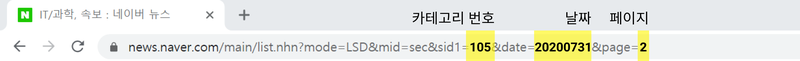

In [14]:
Image('./aiffel/image/exp4_3.jpg')

&sid1=  번호 ; 뉴스 카테고리 번호. 

100 : 정치
101 : 경제
102 : 사회
103 : 생활/문화
104 : 세계
105 : IT/과학
110 : 오피니언
    
&date=  날짜 

&page= 번호 ; 페이지 표시 

In [ ]:
#  HTML 문서구조 이해 ( 페이지에서 마우스 우클릭 '페이지 소스 보기' 또는 키보드 F12 )
# 내부 작은 사각형은 외곽 큰 사각형의 자식인 구조

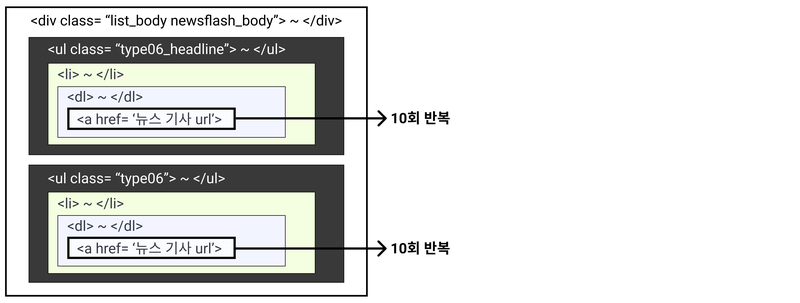

In [15]:
Image('./aiffel/image/exp4_4.jpg')

In [ ]:
## 3-7. BeautifulSoup, newspaper3k 이용 크롤러 만들기 : 네이버 뉴스 크롤링

In [8]:
# 크롤러 생성도구 임포트
import requests
import pandas as pd
from bs4 import BeautifulSoup

# URL 리스트 리턴 함수 : 원하는 페이지 수(page_num), 카테고리(code), 날짜(date) 전달.
def make_urllist(page_num, code, date): 
  urllist= []
  for i in range(1, page_num + 1):
    url = 'https://news.naver.com/main/list.nhn?mode=LSD&mid=sec&sid1='+str(code)+'&date='+str(date)+'&page='+str(i)
    headers = {'User-Agent': 'Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/54.0.2840.90 Safari/537.36'}
    news = requests.get(url, headers=headers)

    # BeautifulSoup 인스턴스 생성. 파서는 html.parser 사용.
    soup = BeautifulSoup(news.content, 'html.parser')

    # CASE 1
    news_list = soup.select('.newsflash_body .type06_headline li dl')
    # CASE 2
    news_list.extend(soup.select('.newsflash_body .type06 li dl'))
        
    # 각 뉴스로부터 a 태그인 <a href ='주소'> 에서 '주소'만 가져오기
    for line in news_list:
        urllist.append(line.a.get('href'))
  return urllist

In [9]:
# 2020년 11월 21일, 경제 기사(코드 101번) 2페이지까지 탐색해 URL 리스트 가져오기
url_list = make_urllist(2, 101, 20201121)
print('뉴스 기사의 개수: ',len(url_list))

뉴스 기사의 개수:  40


In [10]:
# 5개 출력
url_list[:5]

['https://news.naver.com/main/read.nhn?mode=LSD&mid=sec&sid1=101&oid=020&aid=0003321831',
 'https://news.naver.com/main/read.nhn?mode=LSD&mid=sec&sid1=101&oid=021&aid=0002450246',
 'https://news.naver.com/main/read.nhn?mode=LSD&mid=sec&sid1=101&oid=277&aid=0004796042',
 'https://news.naver.com/main/read.nhn?mode=LSD&mid=sec&sid1=101&oid=215&aid=0000917149',
 'https://news.naver.com/main/read.nhn?mode=LSD&mid=sec&sid1=101&oid=052&aid=0001516872']

In [ ]:
# newspaper3k 이용 뉴스 기사 저장하기.

In [11]:
# '뉴스 키: 카테고리' 사전 생성 : 함수 호출시 카테고리 코드(숫자) 사용 중.  결과 확인시  '카테고리 이름'으로 조회 가능
idx2word = {'101' : '경제', '102' : '사회', '103' : '생활/문화', '105' : 'IT/과학'}

In [58]:
#  URL 리스트, 카테고리 코드 입력 -> 데이터프레임 생성 함수 
from newspaper import Article

#- 데이터프레임 생성 함수.
def make_data(urllist, code):
  text_list = []
  for url in urllist:
    article = Article(url, language='ko')
    article.download()
    article.parse()
    text_list.append(article.text)

#- 데이터프레임의 'news' 키 아래 파싱한 텍스트를 밸류로 붙이기.
  df = pd.DataFrame({'news': text_list})

#- 데이터프레임의 'code' 키 아래 한글 카테고리명 붙이기.
  df['code'] = idx2word[str(code)]
  return df

In [59]:
# 경제 카테고리(코드 101)의 40개 URL 리스트로부터 데이터프레임 생성
data = make_data(url_list, 101)
#- 상위 10개만 출력해봅니다.
data[:10]

,news,code
0,● 한국GM 이어 기아자동차도 파업 깃발\n\n지난 19일 오전 한국GM 부평공장 ...,경제
1,농협중앙회는 올해 농촌일손지원 인력 총 150만 명을 달성했다고 21일 밝혔다.농협...,경제
2,18일 오후 서울 중구 국립중앙의료원 선별진료소에 시민들이 줄을 서고 있다. [이미...,경제
3,[한국경제TV 김원규 기자]\n\n서울에서 몇 안되는 투자 유망 지역으로 영등포와 ...,경제
4,동영상 뉴스\n\n글로벌 유통 기업 아마존이 SK텔레콤의 자회사인 11번가를 선택한...,경제
5,"""유행의 예측지표인 감염 재생산지수가 1.5를 넘어서고 있다""며 ""확진자 1명이 1...",경제
6,사진 리틀캣 제공 © 뉴스1 사진 리틀캣 제공 © 뉴스1\n\n김대용 리틀캣 대표와...,경제
7,© News1 최수아 디자이너 © News1 최수아 디자이너\n\n(서울=뉴스1) ...,경제
8,[이데일리 뉴스속보팀] 천스중(陳時中) 대만 위생부장이 이미 여러 백신 제조사와 신...,경제
9,(서울=뉴스1) 안은나 기자 = 21일 오후 서울 서대문구 연세로에서 열린 기후위기...,경제


In [ ]:
# 3-8. (3)데이터 수집 및 전처리 

In [60]:
# 특정 날짜의 사회, 생활/문화, IT/과학의 뉴스 수집하기 : 카테고리 코드 저장 리스트 생성
code_list = [102, 103, 105]

code_list

[102, 103, 105]

In [20]:
def make_total_data(page_num, code_list, date):
  df = None

# 앞서 만든 make_urllist 함수와 make_data 함수 호출
  for code in code_list:
    url_list = make_urllist(page_num, code, date)
    df_temp = make_data(url_list, code)
    print(str(code)+'번 코드에 대한 데이터를 만들었습니다.')

    if df is not None:
      df = pd.concat([df, df_temp])
    else:
      df = df_temp

  return df

In [21]:
# 2020년 5월 6일 기사의 1페이지 크롤링, 102번, 103번, 105번 코드 카테고리 뉴스 수집해 데이터프레임에 저장
df = make_total_data(1, code_list, 20200506)

102번 코드에 대한 데이터를 만들었습니다.
103번 코드에 대한 데이터를 만들었습니다.
105번 코드에 대한 데이터를 만들었습니다.


In [ ]:
1페이지당 20개의 뉴스 기사가 존재하므로, 총 60개의 뉴스기사가 수집되어야 합니다.

In [72]:
# 1페이지당 20개의 뉴스 기사가 존재하므로, 총 60개의 뉴스기사 수집 
print('뉴스 기사의 개수: ',len(df))

뉴스 기사의 개수:  1205


In [73]:
# 임의 10개 샘플 출력, 반복시도 결과 확인
df.sample(10)

,news,code
1319,오늘도 멋진 생각이야의 한 장면 두 갈래 길에서 한참을 망설이다 마침내 왼쪽 길을 ...,생활/문화
676,제주좌승훈 기자 일 아침 서귀포시 동홍동 솔오름미악산 전망대에서 본 일출 장엄한 일...,사회
410,아시아경제 영남취재본부 박동욱 기자 포항시는 일 포스텍포항공과대학교에서 반도체 기술...,사회
554,경남 이상현 기자경남창원방산혁신클러스터 업무협약 체결식사진창원시 제공 경남창원방산혁...,사회
2043,지난월부터 월까지 최근 개월 간 국내 대 암호화폐 거래소의 누적 거래대금 이미지쟁글...,IT/과학
1206,최희선 디자인 박사 현중앙대학교 예술대학원 겸임교수 뉴스 최희선 디자인 박사 현중앙...,생활/문화
1257,동영상 뉴스밤사이 북서쪽에서 찬 공기가 내려오면서 아침 추위가 기승입니다현재 서울 ...,생활/문화
534,안내 해당 언론사가 주요기사로직접 선정한 기사입니다 언론사 편집판 바로가기 닫기 ...,사회
1280,쥐띠 년 의외의 행운이 따른다 년 좋은 일하고 칭찬 받는다 년 돌다리도 두드려보고 ...,생활/문화
1116,사단법인 대한민국국가조찬기도회회장 두상달 장로는 오는 일 오전 시 서울 여의도 국민...,생활/문화


In [ ]:
# 대량 크롤링, 머신 러닝 모델 통해 카테고리 예측 모델 만들기. 

In [96]:
#  3개 카테고리의 40개의 페이지 크롤링 (일자 변경하며 다른 크기의 데이터 수집 체크)
df = make_total_data(40, code_list, 20201121)

102번 코드에 대한 데이터를 만들었습니다.
103번 코드에 대한 데이터를 만들었습니다.
105번 코드에 대한 데이터를 만들었습니다.


In [97]:
import os

# 데이터프레임 파일 -> csv 파일로 저장 ( 저장경로는 이 프로젝트 폴더)
csv_path = os.getenv("HOME") + "/aiffel/news_crawler/news_data.csv"
df.to_csv(csv_path, index=False)

if os.path.exists(csv_path):
  print('{} File Saved!'.format(csv_path))

/Users/john/aiffel/news_crawler/news_data.csv File Saved!


In [ ]:
# 3-9. 네이버 뉴스 기사 크롤링 (4) 데이터 전처리
# 모델 훈련 활용위해 데이터 정제, 숫자 형태로 전환 작업 필요

In [98]:
# 저장해둔 csv 파일, 데이터프레임으로 저장하기
csv_path = os.getenv("HOME") + "/aiffel/news_crawler/news_data.csv"
df = pd.read_table(csv_path, sep=',')
df.head()

,news,code
0,하남시 캐릭터 하남이-방울이. 사진제공=하남시 하남시 캐릭터 하남이-방울이. 사진제...,사회
1,[머니투데이 대학경제 임홍조 기자] 대구사이버대학교가 21일 '이흥표 교수의 정서심...,사회
2,21일(현지시간) 주요 20개국(G20) 정상회의를 화상으로 주재하는 살만 빈 압둘...,사회
3,[머니투데이 대학경제 임홍조 기자] 세종대학교 취업지원처 대학일자리사업단이 내년 1...,사회
4,[머니투데이 대학경제 권태혁 기자]건양대학교 사이버보안학과 이후기(사진) 교수가 1...,사회


In [99]:
# 뉴스 기사  각종 숫자, 영어, \n 같은 HTML 태그 섞여 있어: 정규 표현식 이용 한글 외 문자 전부 제거
df['news'] = df['news'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]","")
df['news']

0       하남시 캐릭터 하남이방울이 사진제공하남시 하남시 캐릭터 하남이방울이 사진제공하남시파...
1       머니투데이 대학경제 임홍조 기자 대구사이버대학교가 일 이흥표 교수의 정서심리특강 불...
2       일현지시간 주요 개국 정상회의를 화상으로 주재하는 살만 빈 압둘아지즈 알사우드 사우...
3       머니투데이 대학경제 임홍조 기자 세종대학교 취업지원처 대학일자리사업단이 내년 월 일...
4       머니투데이 대학경제 권태혁 기자건양대학교 사이버보안학과 이후기사진 교수가 일 열린 ...
                              ...                        
1690    씨이랩이 상용화한 대용량 영상데이터 기반  분석 서비스  가동 화면 씨이랩이 상용화...
1691      전자신문  전자신문인터넷 무단전재 및 재배포 금지한국정보기술연구원원장 유준상은 ...
1692    정재남 디모아 영업본부장 이혁수 디모아 대표 권영범 영림원소프트랩 대표 호웅기 영림...
1693      전자신문  전자신문인터넷 무단전재 및 재배포 금지사이버보안관제서비스 전문기업 시...
1694    네이처 제공 네이처 제공국제학술지 네이처는 일현지시간 전자 회로에 연결된 조리개와 ...
Name: news, Length: 1695, dtype: object

In [100]:
# 데이터에 Null 값이 있지는 않은지 확인
print(df.isnull().sum())

news    0
code    0
dtype: int64


In [101]:
# 중복 샘플 제거 : 중복제거한 데이터 수 확인하고, 수집한 데이터의 개수와 비교하여 데이터에 중복이 있는지 확인
df.drop_duplicates(subset=['news'], inplace=True)
print('뉴스 기사의 개수: ',len(df))

뉴스 기사의 개수:  1182


In [102]:
# 데이터 탐색 ( Matplotlib 한글폰트 설정 https://followers.tistory.com/26 )

/Users/john/anaconda/envs/aiffel/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49324 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/john/anaconda/envs/aiffel/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 54924 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/john/anaconda/envs/aiffel/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49373 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/john/anaconda/envs/aiffel/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 54876 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/john/anaconda/envs/aiffel/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 47928 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/john/anaconda/envs/aiffel/li

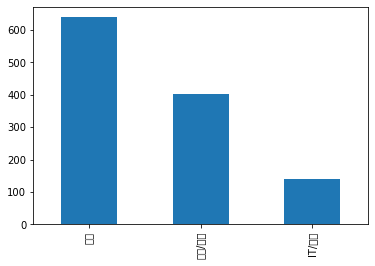

In [103]:
# 각 카테고리별 샘플 분포 확인
df['code'].value_counts().plot(kind = 'bar')

In [104]:
print(df.groupby('code').size().reset_index(name = 'count'))

    code  count
0  IT/과학    140
1     사회    639
2  생활/문화    403


In [105]:
# 토큰화(tokenization, tokenizing ) : 자연어 처리 위해 문자열을 특정단위('토큰(token)'로 분할하는 과정 ,형태소 분석기 사용
# 딥러닝을 이용한 자연어 처리 입문 - 토큰화  https://wikidocs.net/21698

In [106]:
# Mecab의 .morphs 사용, 입력 문자열을 형태소 단위로 분할, 토큰화 수행
from konlpy.tag import Mecab
tokenizer = Mecab()

kor_text = '밤에 귀가하던 여성에게 범죄를 시도한 대 남성이 구속됐다서울 제주경찰서는 \
            상해 혐의로 씨를 구속해 수사하고 있다고 일 밝혔다씨는 지난달 일 피해 여성을 \
            인근 지하철 역에서부터 따라가 폭행을 시도하려다가 도망간 혐의를 받는다피해 \
            여성이 저항하자 놀란 씨는 도망갔으며 신고를 받고 주변을 수색하던 경찰에 \
            체포됐다피해 여성은 이 과정에서 경미한 부상을 입은 것으로 전해졌다'

print(tokenizer.morphs(kor_text))

['밤', '에', '귀가', '하', '던', '여성', '에게', '범죄', '를', '시도', '한', '대', '남성', '이', '구속', '됐', '다', '서울', '제주', '경찰서', '는', '상해', '혐의', '로', '씨', '를', '구속', '해', '수사', '하', '고', '있', '다고', '일', '밝혔', '다', '씨', '는', '지난달', '일', '피해', '여성', '을', '인근', '지하철', '역', '에서부터', '따라가', '폭행', '을', '시도', '하', '려다가', '도망간', '혐의', '를', '받', '는다', '피해', '여성', '이', '저항', '하', '자', '놀란', '씨', '는', '도망갔으며', '신고', '를', '받', '고', '주변', '을', '수색', '하', '던', '경찰', '에', '체포', '됐', '다', '피해', '여성', '은', '이', '과정', '에서', '경미', '한', '부상', '을', '입', '은', '것', '으로', '전해졌', '다']


In [110]:
# 불용어 ( stopwords ; 불필요 토큰 ) 제거  
# 데이터 전체에 많이 등장하지만 자연어 처리에 큰 영향 주지 않는 단어 (ex:  ~가, ~은, ~는과 같은 조사, 접사 등) 
# 불용어 지정 ; 토큰화 결과 확인하며 반복 지정, 제거 필요
stopwords = ['에','는','은','을','를','했','에게','대해','있','이','의','하','한','다','와','과','며','고','때문','할','수','무단','따른','및','금지','전재','조선일보','신문','방송','보도','물론','지난','이어','다는','부터','까지','앞서','위해','다고','에서','위해','밝혀','밝혔다','인','한다','하여','하므로','인한','인해','통해','가뜩','가뜩이나','함께','오전','오후','오늘','쯤','던','씨','양','군','습니다','다','근처','끝내','로','으로','라고','이나','씩','다며','따라','해','경향신문','기자','는데','가','등','들','파이낸셜','저작','등','뉴스']

In [111]:
# 토큰화, 불용어 제거 함수
def preprocessing(data):
    text_data = []

    for sentence in data:
        temp_data = []
    #- 토큰화
        temp_data = tokenizer.morphs(sentence) 
    #- 불용어 제거
        temp_data = [word for word in temp_data if not word in stopwords] 
        text_data.append(temp_data)

    text_data = list(map(' '.join, text_data))

    return text_data

In [112]:
# 전체 데이터 대상 토큰화, 불용어 제거 -> 띄어쓰기 단위로 토큰화된 데이터
text_data = preprocessing(df['news'])
# 첫째 샘플 출력
print(text_data[20])

제주 시 제주시 평화로 택시 승합차 승용차 충돌 택시 승합차 운전자 살 모 승용차 운전자 살 홍 모 숨졌 경찰 소방 당국 현장 목격자 상대 정확 사고 경위 조사 박천수


In [ ]:
# 3-10. 머신 러닝 적용 ;  '나이브 베이즈 분류기'  
# 나이브 베이즈 분류기 설명 https://youtu.be/3JWLIV3NaoQ

In [113]:
# 머신 러닝 도구 임포트
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics

In [114]:
# 사이킷런(scikit-learn 또는 sklearn) : 훈련 데이터, 테스트 데이터 분리
X_train, X_test, y_train, y_test = train_test_split(text_data, df['code'], random_state = 0)

In [115]:
# 분리된 데이터 개수 확인
print('훈련용 뉴스 기사의 개수 :', len(X_train))
print('테스트용 뉴스 기사의 개수 : ', len(X_test))
print('훈련용 레이블의 개수 : ', len(y_train))
print('테스트용 레이블의 개수 : ', len(y_test))

훈련용 뉴스 기사의 개수 : 886
테스트용 뉴스 기사의 개수 :  296
훈련용 레이블의 개수 :  886
테스트용 레이블의 개수 :  296


In [116]:
# 각 뉴스 문서 -> TF-IDF 벡터 변환 -> 나이브 베이즈 분류기 학습.
# 전처리 ;  TF-IDF 사용 https://youtu.be/meEchvkdB1U

In [117]:
# fit_transform() : fit과 transform 수행, 
# CountVectorizer.fit_transform() : 단어 데이터 학습하고 문서 데이터를 document-form matrix로 변환 
# 사이킷런 CountVectorizer.fit_transform https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html#sklearn.feature_extraction.text.CountVectorizer.fit_transform

In [118]:
#- 사이킷런의 카운트벡터라이저 : 단어수 카운트 
count_vect = CountVectorizer()
X_train_counts = count_vect.fit_transform(X_train)

#- 카운트벡터라이저 결과로부터 TF-IDF 결과 얻기
tfidf_transformer = TfidfTransformer()
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)

#- 나이브 베이즈 분류기 수행.
#- X_train은 TF-IDF 벡터, y_train은 레이블입니다.
clf = MultinomialNB().fit(X_train_tfidf, y_train)

In [123]:
# 텍스트 입력 -> TF-IDF 벡터 생성 전처리 함수
def tfidf_vectorizer(data):
    data_counts = count_vect.transform(data)
    data_tfidf = tfidf_transformer.transform(data_counts)
    return data_tfidf

In [124]:
# 모델 학습 ->  '테스트'  (임의 뉴스 이용 카테고리 확인()   

In [125]:
# clf.predict()  : 임의의 입력에 대해 나이브 베이즈 분류기가 예측한 값 리턴
new_sent = preprocessing(["민주당 일각에서 법사위의 체계·자구 심사 기능을 없애야 한다는 \
                           주장이 나오는 데 대해 “체계·자구 심사가 법안 지연의 수단으로 \
                          쓰이는 것은 바람직하지 않다”면서도 “국회를 통과하는 법안 중 위헌\
                          법률이 1년에 10건 넘게 나온다. 그런데 체계·자구 심사까지 없애면 매우 위험하다”고 반박했다."])
print(clf.predict(tfidf_vectorizer(new_sent)))

['사회']


In [126]:
new_sent = preprocessing(["인도 로맨틱 코미디 영화 <까립까립 싱글>(2017)을 봤을 때 나는 두 눈을 의심했다. \
                          저 사람이 남자 주인공이라고? 노안에 가까운 이목구비와 기름때로 뭉친 파마머리와, \
                          대충 툭툭 던지는 말투 등 전혀 로맨틱하지 않은 외모였다. 반감이 일면서 \
                          ‘난 외모지상주의자가 아니다’라고 자부했던 나에 대해 회의가 들었다.\
                           티브이를 꺼버릴까? 다른 걸 볼까? 그런데, 이상하다. 왜 이렇게 매력 있지? 개구리와\
                            같이 툭 불거진 눈망울 안에는 어떤 인도 배우에게서도 느끼지 못한 \
                            부드러움과 선량함, 무엇보다 슬픔이 있었다. 2시간 뒤 영화가 끝나고 나는 완전히 이 배우에게 빠졌다"])
print(clf.predict(tfidf_vectorizer(new_sent)))

['생활/문화']


In [127]:
new_sent = preprocessing(["20분기 연속으로 적자에 시달리는 LG전자가 브랜드 이름부터 성능, 디자인까지 대대적인 변화를 \
                          적용한 LG 벨벳은 등장 전부터 온라인 커뮤니티를 뜨겁게 달궜다. 사용자들은 “디자인이 예쁘다”, \
                          “슬림하다”는 반응을 보이며 LG 벨벳에 대한 기대감을 드러냈다."])
print(clf.predict(tfidf_vectorizer(new_sent)))

['생활/문화']


In [128]:
y_pred = clf.predict(tfidf_vectorizer(X_test))
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       IT/과학       0.93      0.39      0.55        36
          사회       0.67      0.97      0.79       148
       생활/문화       0.91      0.54      0.67       112

    accuracy                           0.74       296
   macro avg       0.84      0.63      0.67       296
weighted avg       0.79      0.74      0.72       296



In [ ]:
# 머신 러닝 모델의 성능 측정 방법 중 하나인 F1-스코어에서  (    )%라는  정확도를 얻어냈습니다!
#참고: IT 용어 위키 - F1 스코어  https://sbabasic.aiffel.io/steps/285

In [ ]:
# 3-11. 프로젝트 - 모델 성능 개선하기
전처리나 형태소 분석기를 바꾸어 보고, 다른 날짜의 훈련 데이터를 일부 추가해 모델을 일반화 하기 위한 고민을 해 볼까요?

# Step 1. 형태소 분석기 변경해 보기
# 한국어 자연어 처리 성능에 영향을 주는 또 다른 요소는 형태소 분석기 종류. 
# Mecab -> (이번에 설치한 konlpy 패키지에 Mecab 이외에도) Hannanum, Kkma, Komoran, Okt 형태소분석기 존재. 
# 형태소 분석기간의 장단점은 무엇인지, 처리 속도와 성능에는 어떤 변화가 있는지 비교

# 참고: KoNLPy 토크나이저 클래스 https://konlpy.org/ko/v0.5.2/api/konlpy.tag/

# Step 2. 불용어 추가해 보기
# 머신 러닝에서 전처리는 끝 없는 작업. 불용어 추가도 마찬가지. 
# 데이터 출력해 보고, 직접 뉴스 열어보면서 불용어가 총 50개가 될 때까지 추가. 
# 불용어 추가전,후 모델성능 비교.

# Step 3. 다른 날짜 데이터 추가해 보기
# 동일 날짜에 특정사건이 일어나 비슷한 뉴스들이 올라왔을 가능성 고려
# 좀 더 정확한 모델을 만들기 위해 다른 날짜의 뉴스도 훈련 데이터로 사용

In [ ]:
# 루브릭

#아래의 기준을 바탕으로 프로젝트를 평가합니다.

#평가문항	상세기준
#1. 한국어 전처리 과정이 적절하였는가?

#형태소 분석기 선택과 불용어 제거가 체계적으로 진행됨
#2. 텍스트 데이터 수집이 분량과 다양성 측면에서 적절했는가?

#일자와 분량에서 텍스트 데이터 다양성 향상을 위한 노력이 확인됨
#3. 분류모델의 test accuracy가 기준 이상 높게 나왔는가?

#F-1 score 기준 83% 이상의 정확도가 확인됨